### Nama Kelompok : 
### 1. Rendy Septianus Mukti - 2201763644
### 2. Andreas Aditya Alvaro Harryanto - 2201767655
### 3. William Antony - 2201767775

#### Disini dilakukan load libraries yang diperlukan

In [1]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Disini kami melakukan pembacaan dataset

In [2]:
emails = pd.read_csv('d:/spam.csv', encoding='latin-1')
emails.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
emails.head(n=10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


#### 1. Analisis awal
#### Disini kami ingin melakukan eksplorasi dataset kami untuk melakukan sedikit analisis

In [3]:
emails.shape

(5572, 2)

In [4]:
emails.groupby('v1').count()


,v2
v1,
ham,4825
spam,747


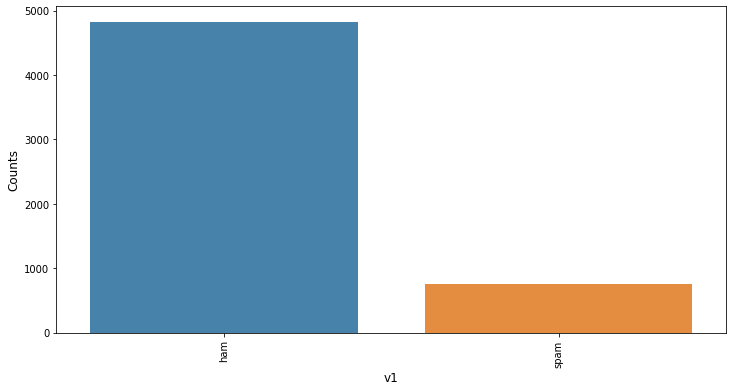

In [5]:
label_counts = emails.v1.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('v1', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

#### 2. Proses NLP model
#### disini kami membuat sebuah fungsi untuk proses tokenisasi yang berguna untuk data v2 dan model

In [6]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

#### disini kami menerapkan fungsi ke data v2 

In [7]:
emails['v2'].apply(process_text).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: v2, dtype: object

#### Dilakukan proses penghilangan stop words 

In [8]:
stop_words = set(nltk.corpus.stopwords.words('english'))
emails['v2'] = emails['v2'].map(lambda tokens: [w for w in tokens if not w in stop_words]) 

#### Menghilangkan spesial karakter 

In [9]:
emails['v2'] = emails['v2'].map(lambda text: ' '.join(text))
emails['v2'] = emails['v2'].map(lambda text: re.sub('[^A-Za-z0-9]+', ' ', text))

#### Proses lematization 

In [10]:
wnl = nltk.WordNetLemmatizer()
emails['v2'] = emails['v2'].map(lambda text: wnl.lemmatize(text))

#### 3. Preprocessing dan training
#### Preprocessing data dan training menggunakan bantuan pipeline 
#### serta proses spliting dan training dataset

In [11]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)), # mengubah string ke integer
    ('tfidf',TfidfTransformer()), # mengkonversi jumlah bilangan bulat ke skor TF-IDF 
    ('classifier',MultinomialNB()) # Proses training pada TF-IDF vectors dengan Naive Bayes classifier
])

In [12]:
v2_train, v2_test, v1_train, v1_test = train_test_split(emails['v2'],emails['v1'],test_size=0.2, random_state=1)

In [13]:
pipeline.fit(v2_train,v1_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x000001A92EAE1E58>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

#### 4. Evaluasi Model
#### Menampung nilai prediksi dan melihat hasil prediksi berdasarkan data seperti precicion recall dll menggunakan bantuan classification report dan accuracy score


In [14]:
predictions = pipeline.predict(v2_test)

In [17]:
print(classification_report(v1_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      0.97      0.97       976
        spam       0.78      0.83      0.81       139

    accuracy                           0.95      1115
   macro avg       0.88      0.90      0.89      1115
weighted avg       0.95      0.95      0.95      1115



In [16]:
from sklearn import metrics
metrics.accuracy_score(v1_test, predictions)

0.9506726457399103